<a href="https://colab.research.google.com/github/udayan35/Password-strength-classifier-from-text/blob/main/PasswordStrengthPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
df = pd.read_csv('final.csv', index_col=0,on_bad_lines='skip')
print(df.shape)
df = df.dropna(subset=['password'])
df = df.dropna(subset=['Strength'])
#df['Strength'] = df['Strength'].astype(int)
print(df.shape)


(217988, 6)
(217987, 6)


In [5]:
# Map string labels to numeric labels
df.loc[df['Strength'] == 'very easy', 'Strength'] = 0
df.loc[df['Strength'] == 'easy', 'Strength'] = 1
df.loc[df['Strength'] == 'medium', 'Strength'] = 2
df.loc[df['Strength'] == 'hard', 'Strength'] = 3

# Split features and target
X = df['password']
Y = df['Strength'].astype('int')  # ensure it's int

In [6]:
# Correct order: train, test = train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=3)

In [7]:
feature_extraction = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
trainX_featured = feature_extraction.fit_transform(trainX)
testX_featured = feature_extraction.transform(testX)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainX_featured, trainY)

# Prediction on training data
prediction_training_data = model.predict(trainX_featured)
accuracyOnTraining = accuracy_score(trainY, prediction_training_data)
print("Accuracy on training data:", accuracyOnTraining)

# Prediction on testing data
prediction_testing_data = model.predict(testX_featured)
accuracyOnTesting = accuracy_score(testY, prediction_testing_data)
print("Accuracy on testing data:", accuracyOnTesting)


Accuracy on training data: 0.9976317313592027
Accuracy on testing data: 0.9688288453598789


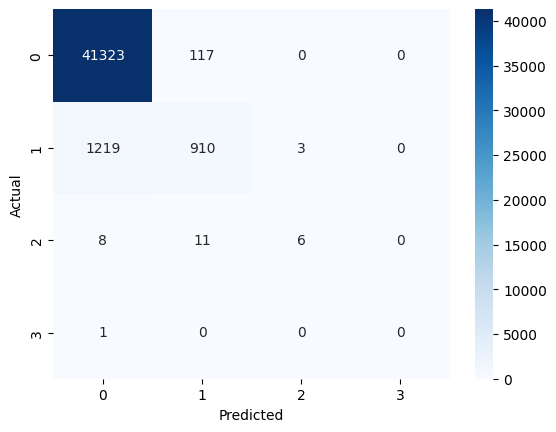

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(testY, prediction_testing_data)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
